In [ ]:
!python --version

Python 3.8.16


In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.4/394.4 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.4/394.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 75.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 KB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 85.4 MB/s eta 0:00:00
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=568a4574a2754dda4a539ef370f0ca13df863d18ace7b0253ecf449ead7d3017
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b

# Create Paths

In [ ]:
import os

In [ ]:
CUSTOM_MODEL_NAME = 'saved_model' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'xml2record.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'GITCLONE_PATH': os.path.join('Tensorflow', 'workspace','gitclone'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'IMAGE_PATH_TRAIN':os.path.join('Tensorflow', 'workspace','images','train'),
    'IMAGE_PATH_TEST':os.path.join('Tensorflow', 'workspace','images','test'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [ ]:
 files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            %mkdir -p {path}
        if os.name == 'nt':
            %mkdir {path}

# Download Dataset From Kaggle

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets  download prithwirajmitra/covid-face-mask-detection-dataset

 89% 185M/207M [00:01<00:00, 148MB/s]
100% 207M/207M [00:01<00:00, 148MB/s]


In [ ]:
!unzip covid-face-mask-detection-dataset.zip -d data

Archive:  covid-face-mask-detection-dataset.zip
  inflating: data/New Masks Dataset/Test/Mask/2070.jpg  
  inflating: data/New Masks Dataset/Test/Mask/2072.jpg  
  inflating: data/New Masks Dataset/Test/Mask/2083.jpg  
  inflating: data/New Masks Dataset/Test/Mask/2085.jpg  
  inflating: data/New Masks Dataset/Test/Mask/2086.jpg  
  inflating: data/New Masks Dataset/Test/Mask/2110.jpg  
  inflating: data/New Masks Dataset/Test/Mask/2113.jpg  
  inflating: data/New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: data/New Masks Dataset/Test/Mask/2130.jpg  
  inflating: data/New Masks Dataset/Test/Mask/2132.jpg  
  inflating: data/New Masks Dataset/Test/Mask/2135.jpg  
  inflating: data/New Masks Dataset/Test/Mask/2154.png  
  inflating: data/New Masks Dataset/Test/Mask/2158.png  
  inflating: data/New Masks Dataset/Test/Mask/2159.png  
  inflating: data/New Masks Dataset/Test/Mask/2160.png  
  inflating: data/New Masks Dataset/Test/Mask/2170.png  
  inflating: data/New Masks Dataset/Tes

In [ ]:
os.chdir('/content/data/')
os.rename('New Masks Dataset','NewMasksDataset')

os.chdir('/content/data/NewMasksDataset/Test/')
os.rename('Non Mask','NonMask')

os.chdir('/content/data/NewMasksDataset/Train/')
os.rename('Non Mask','NonMask')

os.chdir('/content/data/NewMasksDataset/Validation/')
os.rename('Non Mask','NonMask')

# Copy and Rename Images

In [ ]:
from PIL import Image
k=0
path='/content/data/NewMasksDataset/Train/Mask'
for image_file_name in sorted(os.listdir(path)):
  k+=1
  os.chdir('/content')
  im = Image.open(os.path.join(path, image_file_name))
  im.save(os.path.join(paths['IMAGE_PATH_TRAIN'],"")+ str(k) + '.jpg')

print(k)
path='/content/data/NewMasksDataset/Train/NonMask'
for image_file_name in sorted(os.listdir(path)):
  k+=1
  os.chdir('/content')
  im = Image.open(os.path.join(path, image_file_name))
  im.save(os.path.join(paths['IMAGE_PATH_TRAIN'],"")+ str(k) + '.jpg')

print(k)
path='/content/data/NewMasksDataset/Validation/Mask'
for image_file_name in sorted(os.listdir(path)):
  k+=1
  os.chdir('/content')
  im = Image.open(os.path.join(path, image_file_name))
  im.save(os.path.join(paths['IMAGE_PATH_TRAIN'],"")+ str(k) + '.jpg')

print(k)
path='/content/data/NewMasksDataset/Validation/NonMask'
for image_file_name in sorted(os.listdir(path)):
  k+=1
  os.chdir('/content')
  im = Image.open(os.path.join(path, image_file_name))
  im.save(os.path.join(paths['IMAGE_PATH_TRAIN'],"")+ str(k) + '.jpg')

print(k)
path='/content/data/NewMasksDataset/Test/Mask'
for image_file_name in sorted(os.listdir(path)):
  k+=1
  os.chdir('/content')
  im = Image.open(os.path.join(path, image_file_name))
  im.save(os.path.join(paths['IMAGE_PATH_TEST'],"")+ str(k) + '.jpg')

print(k)
path='/content/data/NewMasksDataset/Test/NonMask'
for image_file_name in sorted(os.listdir(path)):
  k+=1
  os.chdir('/content')
  im = Image.open(os.path.join(path, image_file_name))
  im.save(os.path.join(paths['IMAGE_PATH_TEST'],"")+ str(k) + '.jpg')
    
print(k)

300
600
753
906
956
1006


In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

find: ‘./drive/MyDrive/class1’: Input/output error


# Download Labels and Script file

In [ ]:
!git clone https://github.com/sahinalp/Mask-Detection {paths['GITCLONE_PATH']}

Cloning into 'Tensorflow/workspace/gitclone'...
remote: Enumerating objects: 1016, done.
remote: Counting objects: 100% (1016/1016), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 1016 (delta 996), reused 1014 (delta 994), pack-reused 0
Receiving objects: 100% (1016/1016), 129.51 KiB | 8.63 MiB/s, done.
Resolving deltas: 100% (996/996), done.


# Move Label and Script file

In [ ]:
!cp {os.path.join(paths['GITCLONE_PATH'],'xml2record' , 'xml2record.py')} {os.path.join(paths['SCRIPTS_PATH'])}

for i in range(1,907):
  name=str(i)+'.xml'
  !cp {os.path.join(paths['GITCLONE_PATH'],'Labels' ,name)} {os.path.join(paths['IMAGE_PATH_TRAIN'])}

for i in range(907,1007):
  name=str(i)+'.xml'
  !cp {os.path.join(paths['GITCLONE_PATH'],'Labels' ,name)} {os.path.join(paths['IMAGE_PATH_TEST'])}

# Download pre-trained model

In [ ]:
if os.name=='nt':
    %pip install wget
    import wget

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 80112, done.
remote: Counting objects: 100% (298/298), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 80112 (delta 151), reused 243 (delta 118), pack-reused 79814
Receiving objects: 100% (80112/80112), 594.50 MiB | 23.16 MiB/s, done.
Resolving deltas: 100% (56987/56987), done.


In [ ]:
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/Tensorflow/models/research
  Preparing metadata (setup.py) ... done


In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
!python {VERIFICATION_SCRIPT}

In [ ]:
import object_detection

In [ ]:
!pip list

In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

# Label

In [ ]:
labels = [{'name':'masked', 'id':1}, {'name':'unmasked', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# TF record

In [ ]:
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

# Model config --> Training folder

In [ ]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# Update Config file

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 32
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

# Training the Model

In [ ]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
!{command}

2022-12-29 17:27:33.285422: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-29 17:27:33.285564: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-29 17:27:33.285585: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-12-29 17:27:36.663178: W tensorflow/core/common_runt

# Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/saved_model --pipeline_config_path=Tensorflow/workspace/models/saved_model/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/saved_model


In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])
!{command}

2022-12-29 17:43:19.874670: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-29 17:43:19.875448: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-29 17:43:19.875486: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
W1229 17:43:26.774800 139887191349120 model_lib_v2.py:108

In [ ]:
# --load_fast=true
!cd /content/Tensorflow/workspace/models/saved_model/train
!tensorboard --logdir=. --port 6006

2022-12-29 18:01:35.620273: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-29 18:01:35.620398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-29 18:01:35.620427: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

NOTE: Using experimental fast data loading logic. To dis

# Load train model from checkpoint

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detect from an image

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '1001.jpg')
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

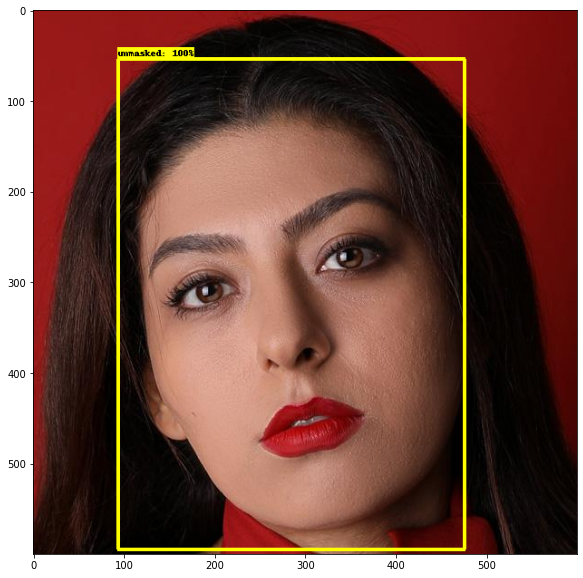

In [ ]:
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=50,
            min_score_thresh=.8,
            agnostic_mode=False)
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])
!{command}

2022-12-29 18:39:30.944522: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-29 18:39:30.944723: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-29 18:39:30.944748: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-12-29 18:39:33.908514: W tensorflow/core/common_runt

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
!zip -r '/content/export.zip' '/content/Tensorflow/workspace/models/saved_model/export'